In [79]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [80]:
# Libraries to use
from __future__ import division 
import talib as tb
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [82]:
%matplotlib inline

In [83]:
# Files to use 
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameHSOpen = 'LZ_GPA_INDXQUOTE_OPEN.csv'
filenameHS300Weight = 'LZ_GPA_INDEX_HS300WEIGHT.csv'
filanemaZX500Weight = 'LZ_GPA_INDEX_CSI500WEIGHT.csv'

In [84]:
# Constants
path = ff.data_path
timeStampNum = 1000
thresholdNum = 0.2
HSIndex='000300.SH'
sampleNum = 500

In [208]:
HS300WeightDF = pd.read_csv(path+filanemaZX500Weight,infer_datetime_format=True,parse_dates=[0],index_col=0).iloc[-2000:]

In [209]:
HS300WeightDF

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,603179.SH,603517.SH,002856.SZ,300626.SZ,603133.SH,002855.SZ,300627.SZ,603656.SH,002857.SZ,300631.SZ
LZ_GPA_INDEX_CSI500WEIGHT-d,,,,,,,,,,,,,,,,,,,,,
2008-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
for i in range(1,len(HS300WeightDF)):
    HS300WeightToday = HS300WeightDF.iloc[i].dropna().index.tolist()
    #print HS300WeightToday
    print len(HS300WeightToday)
    HS300WeightYes = HS300WeightDF.iloc[i-1].dropna().index.tolist()
    if len(set(HS300WeightToday) | set(HS300WeightYes)) != 500:
        print HS300WeightDF.index[i]

0
2008-12-30 00:00:00
0
2008-12-31 00:00:00
0
2009-01-05 00:00:00
0
2009-01-06 00:00:00
0
2009-01-07 00:00:00
0
2009-01-08 00:00:00
0
2009-01-09 00:00:00
0
2009-01-12 00:00:00
0
2009-01-13 00:00:00
0
2009-01-14 00:00:00
0
2009-01-15 00:00:00
0
2009-01-16 00:00:00
0
2009-01-19 00:00:00
0
2009-01-20 00:00:00
0
2009-01-21 00:00:00
0
2009-01-22 00:00:00
0
2009-01-23 00:00:00
0
2009-02-02 00:00:00
0
2009-02-03 00:00:00
0
2009-02-04 00:00:00
0
2009-02-05 00:00:00
0
2009-02-06 00:00:00
0
2009-02-09 00:00:00
0
2009-02-10 00:00:00
0
2009-02-11 00:00:00
0
2009-02-12 00:00:00
0
2009-02-13 00:00:00
0
2009-02-16 00:00:00
0
2009-02-17 00:00:00
0
2009-02-18 00:00:00
0
2009-02-19 00:00:00
0
2009-02-20 00:00:00
0
2009-02-23 00:00:00
0
2009-02-24 00:00:00
0
2009-02-25 00:00:00
0
2009-02-26 00:00:00
0
2009-02-27 00:00:00
0
2009-03-02 00:00:00
0
2009-03-03 00:00:00
0
2009-03-04 00:00:00
0
2009-03-05 00:00:00
0
2009-03-06 00:00:00
0
2009-03-09 00:00:00
0
2009-03-10 00:00:00
0
2009-03-11 00:00:00
0
2009-03-

In [88]:
HS300WeightDF

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300622.SZ,603811.SH,300621.SZ,300625.SZ,300628.SZ,603179.SH,603517.SH,002856.SZ,300626.SZ,603133.SH
LZ_GPA_INDEX_CSI500WEIGHT-d,,,,,,,,,,,,,,,,,,,,,
2008-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
benchMarkClose = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]
benchMarkOpen = pd.read_csv(path+filenameHSOpen,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]
benchMarkClose.head()

LZ_GPA_INDXQUOTE_CLOSE-d
2013-01-31    2686.882
2013-02-01    2743.324
2013-02-04    2748.028
2013-02-05    2771.675
2013-02-06    2775.844
Name: 000300.SH, dtype: float64

In [90]:
def getSVD(inputArray,t,m):
    inputmatrix = getNewMatrix(inputArray,t,m)
    #print inputmatrix
    u,s,v = np.linalg.svd(inputmatrix)
    eviNum = 1 if s[0]/s.sum() > 0.99  else 2
    sNew = np.zeros((eviNum,eviNum))
    np.fill_diagonal(sNew,s[:eviNum])
    matrixForts = np.dot(np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew),v[:eviNum])
    newts = recreateArray(matrixForts,t,m)
    return newts

In [91]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [92]:
def getNewMatrix(inputArray, t, m):
    newMatrix = []
    n = t-m+1
    for i in range(n):
        newdata = list(inputArray[i:m+i])
        newMatrix.append(newdata)
    #newMatrix = np.array(newMatrix).reshape(n,m)
    return np.array(newMatrix)

In [93]:
benchMarkOpen[-15:]

LZ_GPA_INDXQUOTE_OPEN-d
2017-02-20    3421.6434
2017-02-21    3475.0584
2017-02-22    3483.2008
2017-02-23    3487.5745
2017-02-24    3468.9588
2017-02-27    3471.1319
2017-02-28    3445.0274
2017-03-01    3452.2058
2017-03-02    3463.4829
2017-03-03    3424.6627
2017-03-06    3427.2533
2017-03-07    3446.1628
2017-03-08    3452.2006
2017-03-09    3442.8953
2017-03-10    3423.9776
Name: 000300.SH, dtype: float64

In [94]:
inputmatrix = getNewMatrix(benchMarkClose[0:sampleNum].values,sampleNum,10)
len(inputmatrix)

491

In [95]:
def calSVD(newMatrix):
    u,s,v = np.linalg.svd(newMatrix)
    return u,s,v

In [96]:
inputmatrix = getNewMatrix(benchMarkClose[0:sampleNum].values,sampleNum,10)
u,s,v=calSVD(inputmatrix)
eviNum = 1 if s[0]/s.sum() > 0.99  else 2

In [97]:
#u[:,eviNum].reshape(7,1)

In [98]:
sNew = np.zeros((eviNum,eviNum))

In [99]:
np.fill_diagonal(sNew,s[:eviNum])

In [100]:
v[:eviNum]

array([[-0.31510701, -0.31537456, -0.31562105, -0.31586833, -0.31611281,
        -0.31635647, -0.3165809 , -0.31682696, -0.31707734, -0.31734439],
       [-0.4456581 , -0.39707594, -0.31341688, -0.20274835, -0.07191108,
         0.06906303,  0.19892114,  0.31115722,  0.39667384,  0.44799893]])

In [101]:
#np.array([[1,2],[6,3]]).dot(np.array([[1,2],[2,3],[3,4]]))

In [102]:
def recreateArray(newMatrix,t,m):
    ret = []
    n = t - m +1
    for p in range(1,t+1):
        if p<m:
            alpha = p
        elif p>t-m+1:
            alpha = t-p+1
        else:
            alpha = m
        sigma = 0
        for j in range(1,m+1):
            i = p - j +1
            if i>0 and i<n+1:
                sigma += newMatrix[i-1][j-1]
        ret.append(sigma/alpha)
    return np.array(ret)

In [103]:
np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew)

array([[ -8.65922302e+03,  -3.97527233e+01],
       [ -8.63487312e+03,  -1.30515065e+02],
       [ -8.58834626e+03,  -1.91081020e+02],
       [ -8.54302514e+03,  -2.28844612e+02],
       [ -8.47843610e+03,  -2.52306356e+02],
       [ -8.42117805e+03,  -2.39090672e+02],
       [ -8.39395222e+03,  -1.76297192e+02],
       [ -8.36158879e+03,  -9.53437713e+01],
       [ -8.30096432e+03,  -7.75641580e+01],
       [ -8.28118482e+03,  -4.14083850e+01],
       [ -8.26475525e+03,   1.72587708e+01],
       [ -8.26758266e+03,   1.70089004e+01],
       [ -8.27081309e+03,   1.55654171e+00],
       [ -8.26679350e+03,  -1.77166919e+01],
       [ -8.26287750e+03,  -7.05554643e+01],
       [ -8.24150962e+03,  -1.19165162e+02],
       [ -8.19754878e+03,  -1.19099078e+02],
       [ -8.15681549e+03,  -1.08163454e+02],
       [ -8.14301496e+03,  -1.60724359e+02],
       [ -8.11212454e+03,  -1.54756768e+02],
       [ -8.09963165e+03,  -8.50112738e+01],
       [ -8.09834831e+03,  -2.10136550e+01],
       [ -

In [104]:
#np.dot(u[:,eviNum].reshape(u.shape[0],eviNum),v[:eviNum])

In [201]:
np.concatenate((np.diag(np.ones(60)),-np.diag(np.ones(60))))

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [-0., -0., -0., ..., -1., -0., -0.],
       [-0., -0., -0., ..., -0., -1., -0.],
       [-0., -0., -0., ..., -0., -0., -1.]])

In [207]:
a=pd.Series(data=[-1,2,3,4],index = ['a','b','c','d'])
b = pd .Series(data=[4,6,7,8],index = ['a','b','c','d'])
c = pd.Series(data= None ,index =['a','b','c','d','e'] )
a[a>0].index

Index([u'b', u'c', u'd'], dtype='object')

In [105]:
matrixForts = np.dot(np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew),v[:eviNum])

In [106]:
matrixForts

array([[ 2746.29797655,  2746.68348127,  2745.49222674, ...,
         2731.10593133,  2729.87452622,  2730.1466719 ],
       [ 2779.074125  ,  2775.04368443,  2766.2533359 , ...,
         2695.14986904,  2686.1506777 ,  2681.75793527],
       [ 2791.4048934 ,  2784.41957971,  2770.55087195, ...,
         2661.56337088,  2647.37313375,  2639.85941307],
       ..., 
       [ 3349.83464285,  3362.12547595,  3380.95450407, ...,
         3514.61009495,  3533.83995308,  3546.65457419],
       [ 3384.99388671,  3396.3012803 ,  3413.41918063, ...,
         3534.24778124,  3551.72838738,  3563.50275992],
       [ 3416.15182395,  3426.85679087,  3442.9200136 , ...,
         3555.8235003 ,  3572.225883  ,  3583.36255655]])

In [107]:
ma = benchMarkClose[0:sampleNum].rolling(10,min_periods=1).mean()

In [108]:
benchMarkClose[0:sampleNum].head()

LZ_GPA_INDXQUOTE_CLOSE-d
2013-01-31    2686.882
2013-02-01    2743.324
2013-02-04    2748.028
2013-02-05    2771.675
2013-02-06    2775.844
Name: 000300.SH, dtype: float64

In [109]:
ma.tail()

LZ_GPA_INDXQUOTE_CLOSE-d
2015-02-17    3420.2629
2015-02-25    3427.9590
2015-02-26    3447.8939
2015-02-27    3473.9362
2015-03-02    3499.4706
Name: 000300.SH, dtype: float64

In [110]:
newts = recreateArray(matrixForts,sampleNum,10)

In [111]:
getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20)

array([ 2756.28260405,  2755.34704498,  2750.21198064,  2743.16465223,
        2734.30697919,  2724.17165626,  2713.20823254,  2701.14632198,
        2689.03580783,  2677.46823113,  2665.46006084,  2654.42388422,
        2644.34787376,  2635.01429466,  2626.92454523,  2619.58519523,
        2612.44866495,  2605.57628068,  2600.07117592,  2595.10617317,
        2590.15614099,  2585.63226673,  2581.31787465,  2577.2510137 ,
        2573.77982233,  2571.18724196,  2569.25031964,  2567.50900821,
        2566.44860903,  2565.61050563,  2563.09925923,  2559.01450391,
        2553.53101575,  2546.50155274,  2538.76380156,  2530.1599605 ,
        2521.81381717,  2513.65395677,  2506.03635838,  2498.84594084,
        2492.02296575,  2485.93227126,  2480.32486172,  2475.39752712,
        2471.55991933,  2469.15125028,  2468.42579317,  2468.85308476,
        2470.50898767,  2473.17367535,  2475.36932136,  2477.20422482,
        2479.94770662,  2482.83575513,  2486.32473408,  2490.77464027,
      

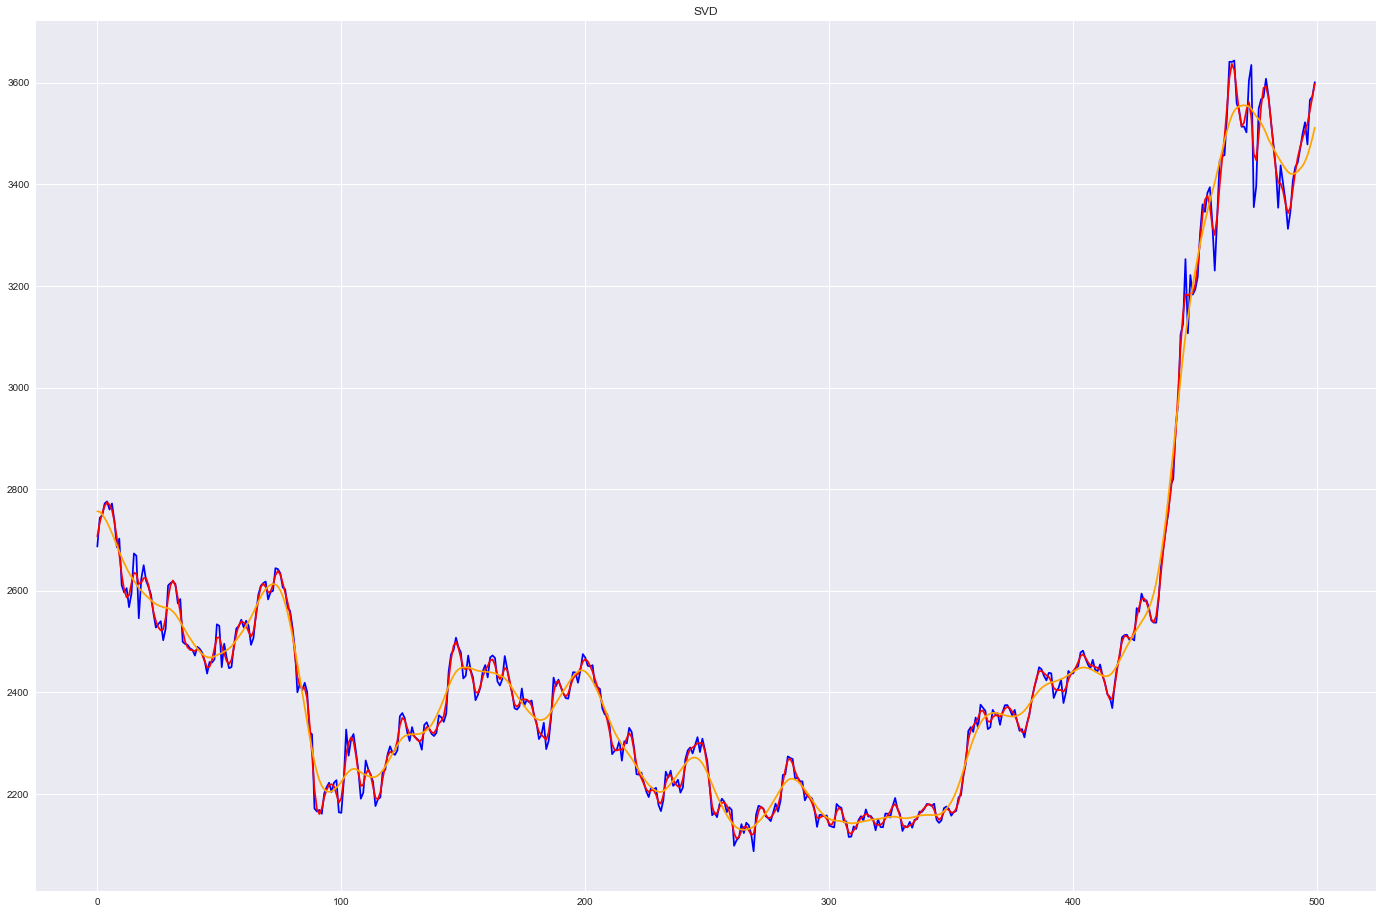

In [112]:
plt.figure(figsize=(24,16))
plt.plot(benchMarkClose[0:sampleNum].values, 'blue')
plt.plot(getSVD(benchMarkClose[0:sampleNum].values,sampleNum,5),'red')
#plt.plot(getSVD(benchMarkData[0:sampleNum].values,sampleNum,15),'green')
plt.plot(getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20),'orange')
plt.title('SVD')

In [113]:
newDF=pd.DataFrame(index = benchMarkClose[0:sampleNum].index,data = None,columns =['SVD20','SVD5','PRICE'],dtype=float)

In [114]:
newDF['SVD20'] = getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20)
newDF['SVD5'] = getSVD(benchMarkClose[0:sampleNum].values,sampleNum,5)
newDF ['PRICE'] = benchMarkClose[0:sampleNum].values

In [115]:
newDF['DIFF'] = newDF['SVD5'] - newDF['SVD20']
newDF['Price_change'] = newDF['PRICE'].diff()
newDF
upAccuracy = []
downAccuracy = []
for i in range(1,len(newDF)):
    if (newDF.iloc[i]['DIFF'] > 0) & (newDF.iloc[i-1]['DIFF'] < 0) & (newDF.iloc[i]['Price_change'] > 0) :
        upAccuracy.append(1)
    if (newDF.iloc[i]['DIFF'] < 0) & (newDF.iloc[i-1]['DIFF'] > 0) & (newDF.iloc[i]['Price_change'] < 0) :
        downAccuracy.append(-1)
a,b = len(upAccuracy)/len(newDF[newDF['Price_change']>0]), len(downAccuracy)/len(newDF[newDF['Price_change']<0])

In [116]:
newDF[newDF['Price_change']>0]

,SVD20,SVD5,PRICE,DIFF,Price_change
LZ_GPA_INDXQUOTE_CLOSE-d,,,,,
2013-02-01,2755.347045,2734.336280,2743.324,-21.010765,56.442
2013-02-04,2750.211981,2752.327664,2748.028,2.115683,4.704
2013-02-05,2743.164652,2766.751923,2771.675,23.587271,23.647
2013-02-06,2734.306979,2774.244067,2775.844,39.937088,4.169
2013-02-08,2713.208233,2759.207767,2771.725,45.999535,11.855
2013-02-20,2677.468231,2671.546891,2702.635,-5.921340,17.029
2013-02-25,2644.347874,2586.821422,2604.960,-57.526452,8.356
2013-02-27,2626.924545,2614.413394,2594.677,-12.511151,27.082
2013-02-28,2619.585195,2635.552571,2673.327,15.967376,78.650


In [117]:
m=7
t=15
dateList = benchMarkOpen.index
assetSSA = []
assetMA = []
holdingFlag = False
tradinglogSSA ={}
tradinglogMA ={}
portfolioValue ={i:0 for i in benchMarkClose.index[:t]}
ma_strategy = {i:0 for i in benchMarkClose.index[:t]}
for i in range(t,len(benchMarkClose)):
    todayDate = dateList[i]
    yesterDayDate = dateList[i-1]
    svdSignal = benchMarkClose.values[:i][-t:]
    #print len(svdSignal)
    newTS = getSVD(svdSignal,t,m)
    #print newTS
    #ma = benchMarkClose.iloc[:i].rolling(m,min_periods =1).mean()
    if len(assetSSA) !=0 and benchMarkClose[i-2] > newTS[-2] and benchMarkClose[i-1] < newTS[-1]: # sell signal
        sellprice = benchMarkOpen[i]
        #holdingFlag = False
        tradinglogSSA[todayDate] = (sellprice,-1)
        portfolioValue[todayDate] = (sellprice - assetSSA[0])/assetSSA[0] + portfolioValue[yesterDayDate]
        assetSSA = []
    elif len(assetSSA) == 0 and benchMarkClose[i-2] < newTS[-2] and benchMarkClose[i-1] > newTS[-1]: # buy signal
        buyprice = benchMarkOpen[i]
        assetSSA.append(buyprice)
        tradinglogSSA[todayDate] = (buyprice,1)
        #holdingFlag = True
        portfolioValue[todayDate] = portfolioValue[yesterDayDate]
    else:
        portfolioValue[todayDate] = portfolioValue[yesterDayDate]
    

In [118]:
for i in range(t,len(benchMarkClose)):
    todayDate = dateList[i]
    yesterDayDate = dateList[i-1]
    ma = benchMarkClose.iloc[:i].rolling(m,min_periods =1).mean()
### For MA strategy    
    if  len(assetMA) !=0 and benchMarkClose[i-2] > ma.iloc[-2] and benchMarkClose[i-1] < ma.iloc[-1]: # sell signal
        #print 1
        sellprice = benchMarkOpen[i]
        #holdingFlag = False
        tradinglogMA[todayDate] = (sellprice,-1)
        ma_strategy[todayDate] = ( sellprice - assetMA[0])/assetMA[0] + ma_strategy[yesterDayDate]
        assetMA = []
    elif len(assetMA) == 0 and benchMarkClose[i-2] < ma.iloc[-2] and benchMarkClose[i-1] > ma.iloc[-1]: # buy signal
        #print -1
        buyprice = benchMarkOpen[i]
        assetMA.append(buyprice)
        tradinglogMA[todayDate] = (buyprice,1)
        #holdingFlag = True
        ma_strategy[todayDate] = ma_strategy[yesterDayDate]
    else:
        ma_strategy[todayDate] = ma_strategy[yesterDayDate]
    #print i , assetMA,sellprice

In [119]:
 ma_strategy

{Timestamp('2013-01-31 00:00:00'): 0,
 Timestamp('2013-02-01 00:00:00'): 0,
 Timestamp('2013-02-04 00:00:00'): 0,
 Timestamp('2013-02-05 00:00:00'): 0,
 Timestamp('2013-02-06 00:00:00'): 0,
 Timestamp('2013-02-07 00:00:00'): 0,
 Timestamp('2013-02-08 00:00:00'): 0,
 Timestamp('2013-02-18 00:00:00'): 0,
 Timestamp('2013-02-19 00:00:00'): 0,
 Timestamp('2013-02-20 00:00:00'): 0,
 Timestamp('2013-02-21 00:00:00'): 0,
 Timestamp('2013-02-22 00:00:00'): 0,
 Timestamp('2013-02-25 00:00:00'): 0,
 Timestamp('2013-02-26 00:00:00'): 0,
 Timestamp('2013-02-27 00:00:00'): 0,
 Timestamp('2013-02-28 00:00:00'): 0,
 Timestamp('2013-03-01 00:00:00'): 0,
 Timestamp('2013-03-04 00:00:00'): 0,
 Timestamp('2013-03-05 00:00:00'): -0.046390841973440074,
 Timestamp('2013-03-06 00:00:00'): -0.046390841973440074,
 Timestamp('2013-03-07 00:00:00'): -0.046390841973440074,
 Timestamp('2013-03-08 00:00:00'): -0.051015738078371134,
 Timestamp('2013-03-11 00:00:00'): -0.051015738078371134,
 Timestamp('2013-03-12 00:

In [120]:
portfolioValue

{Timestamp('2013-01-31 00:00:00'): 0,
 Timestamp('2013-02-01 00:00:00'): 0,
 Timestamp('2013-02-04 00:00:00'): 0,
 Timestamp('2013-02-05 00:00:00'): 0,
 Timestamp('2013-02-06 00:00:00'): 0,
 Timestamp('2013-02-07 00:00:00'): 0,
 Timestamp('2013-02-08 00:00:00'): 0,
 Timestamp('2013-02-18 00:00:00'): 0,
 Timestamp('2013-02-19 00:00:00'): 0,
 Timestamp('2013-02-20 00:00:00'): 0,
 Timestamp('2013-02-21 00:00:00'): 0,
 Timestamp('2013-02-22 00:00:00'): 0,
 Timestamp('2013-02-25 00:00:00'): 0,
 Timestamp('2013-02-26 00:00:00'): 0,
 Timestamp('2013-02-27 00:00:00'): 0,
 Timestamp('2013-02-28 00:00:00'): 0,
 Timestamp('2013-03-01 00:00:00'): 0,
 Timestamp('2013-03-04 00:00:00'): 0.0028637717558596359,
 Timestamp('2013-03-05 00:00:00'): 0.0028637717558596359,
 Timestamp('2013-03-06 00:00:00'): 0.0028637717558596359,
 Timestamp('2013-03-07 00:00:00'): 0.0028637717558596359,
 Timestamp('2013-03-08 00:00:00'): -0.0017611243490714217,
 Timestamp('2013-03-11 00:00:00'): -0.0017611243490714217,
 Tim

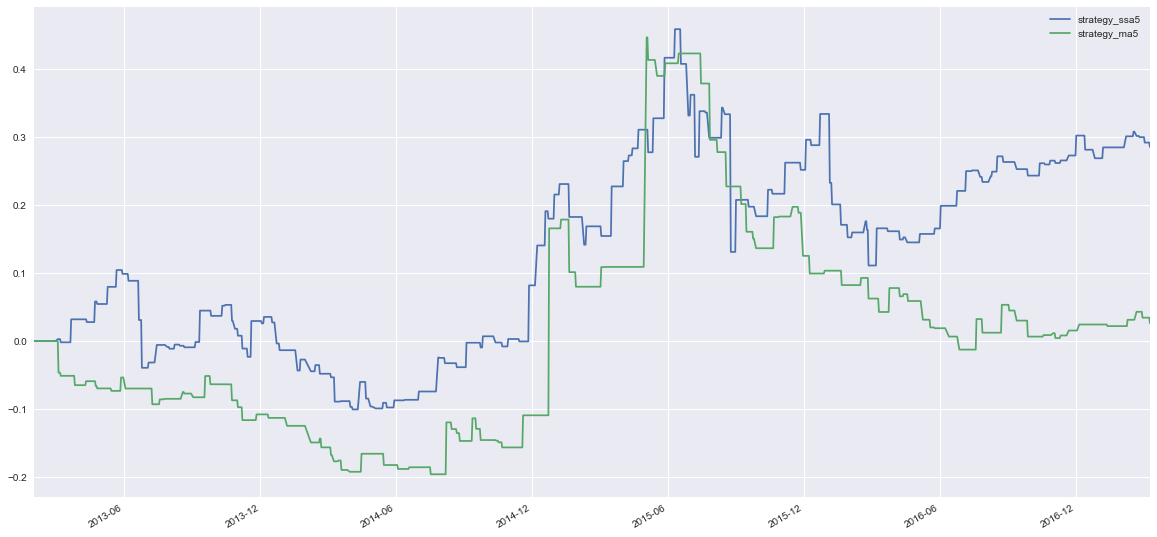

In [121]:
strategy_cmp = pd.DataFrame() 
strategy_cmp['strategy_ssa5'] = pd.Series(portfolioValue)
strategy_cmp['strategy_ma5'] = pd.Series(ma_strategy)
strategy_cmp.plot(figsize=(20,10))

In [122]:
benchMarkOpen.rolling(m,min_periods =1).mean()

LZ_GPA_INDXQUOTE_OPEN-d
2013-01-31    2690.951000
2013-02-01    2684.069000
2013-02-04    2707.275333
2013-02-05    2712.439000
2013-02-06    2724.332800
2013-02-07    2732.199000
2013-02-08    2735.549000
2013-02-18    2748.851000
2013-02-19    2757.116429
2013-02-20    2747.460000
2013-02-21    2740.004429
2013-02-22    2716.539000
2013-02-25    2693.056000
2013-02-26    2669.016857
2013-02-27    2639.299857
2013-02-28    2621.713429
2013-03-01    2619.677571
2013-03-04    2611.631714
2013-03-05    2603.095000
2013-03-06    2607.055143
2013-03-07    2614.542000
2013-03-08    2621.204571
2013-03-11    2619.538571
2013-03-12    2607.902714
2013-03-13    2598.232143
2013-03-14    2593.925286
2013-03-15    2579.475571
2013-03-18    2563.231857
2013-03-19    2546.762143
2013-03-20    2536.289286
                 ...     
2017-01-23    3325.433714
2017-01-24    3331.887271
2017-01-25    3338.673757
2017-01-26    3349.053871
2017-02-03    3358.709957
2017-02-06    3364.017943
2017-02-07    

In [123]:
tb.MACD(benchMarkOpen.values)

(array([             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
         -3.12163472e+01,  -2.97884193e+01,  -3.15001861e+01,
         -3.51312492e+01,  -3.88803356e+01,  -4.06235191e+01,
         -4.16831471e+01,  -4.60777371e+01,  -4.62794502e+01,
         -4.50570038e+01,  -4.24278050e+01,  -4.19726571e+01,
         -4.29210438e+01,  -4.59238191e+01,  -4.46919785e+01,
        